# Stock price prediction using LSTM (Deep Learning Methods)
**referance:**

**youtube video from GeeksforGeeks named "Build a stack Trend Prediction Web App in python"**

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# to remove warnings from the code
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
# import data
df = pd.read_csv("AAPL.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


In [ ]:
# # resetting index
# df = df.reset_index()
# df

In [3]:
# droping columns which are not useful for the analysis
df = df.drop(['High','Adj Close', 'Low','Open', 'Volume'], axis = 1)
df.head()

,Date,Close
0,2012-01-03,58.747143
1,2012-01-04,59.062859
2,2012-01-05,59.718571
3,2012-01-06,60.342857
4,2012-01-09,60.247143


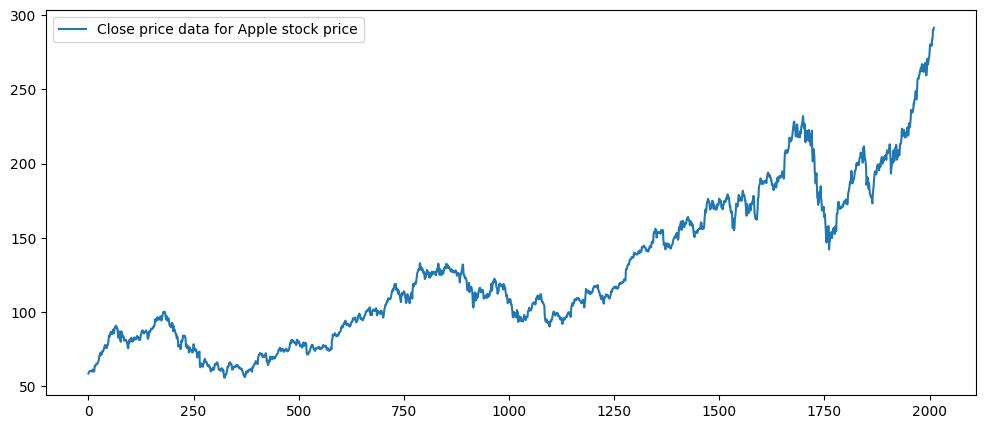

In [6]:
# ploting close price
plt.figure(figsize=(12,5))
plt.plot(df.Close, label = 'Close price data for Apple stock price')
plt.legend(loc='best')
plt.show()

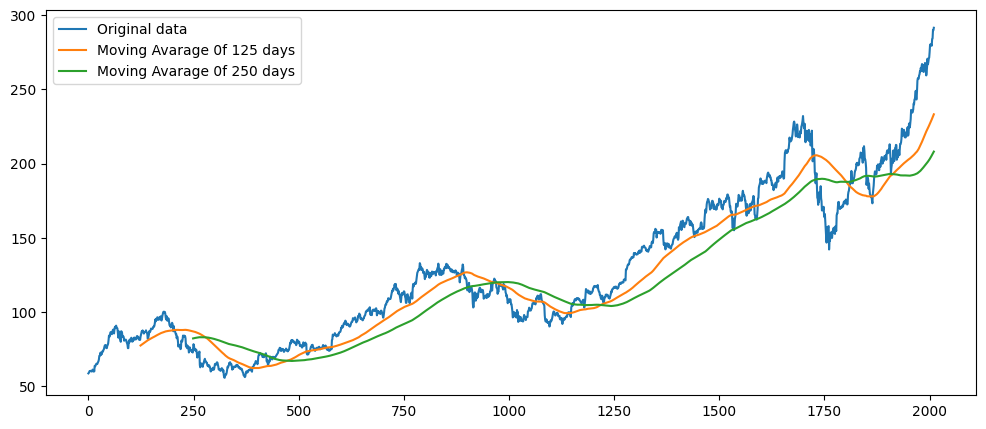

In [7]:
# 125 days moving avarages
ma_125 = df.Close.rolling(125).mean()
# 250 days moving avarage
ma_250 = df.Close.rolling(250).mean()
# ploting 200 days moving avarage
plt.figure(figsize=(12,5))
plt.plot(df.Close, label='Original data')
plt.plot(ma_125, label='Moving Avarage 0f 125 days')
plt.plot(ma_250, label='Moving Avarage 0f 250 days')
plt.legend(loc='best')
plt.show()

In [8]:
# splitting data into training and testing
train_data       = pd.DataFrame(df['Close'][0:int(len(df)*0.80)])
# validation_data  = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df)*0.80)])
test_data        = pd.DataFrame(df['Close'][int(len(df)*0.80):len(df)])
print(train_data.shape, test_data.shape)

(1608, 1) (403, 1)


In [9]:
# converting data into scaled data(?)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1)) #to avoid 0 for lowest value of price
train_data_array = scaler.fit_transform(train_data)
train_data_array
train_data_array.shape

(1608, 1)

In [10]:
# Data preparation for training x_train, y_train and creating lag data as features for the traing
x_train = []
y_train = []
n_features_of_lags = 100 
#No_of_lag_columns, this is a parameter given by user , n_features_of_lags=100 means value on the present day depends on past 100 days

for i in range(n_features_of_lags, len(train_data)):
    x_train.append(train_data_array[i-100:i,0])
    y_train.append(train_data_array[i,0])

#convering x_train and y_train in numpy array
x_train, y_train = np.array(x_train), np.array(y_train) 
x_train.shape

# reshaping the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
# y_train = np.reshape(y_train,(x_train.shape[0], 1))
x_train.shape, y_train.shape

((1508, 100, 1), (1508,))

In [11]:
# Deep Learning Model (LSTM)
from keras.layers import Dense, Dropout, LSTM, Input
from keras.models import Sequential

model = Sequential()
model.add(LSTM(units=128, activation = 'relu', return_sequences = True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences = False))
model.add(Dropout(0.1))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 128)          66560     
                                                                 
 dropout (Dropout)           (None, 100, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trai

In [12]:
# compilin the model
model.compile(optimizer='adam', loss='mean_squared_error')# use validation data for evaluating MAPE metric
model.fit(x_train,y_train, epochs =25)

Epoch 1/25
48/48 [==============================] - 23s 279ms/step - loss: 0.0172
Epoch 2/25
48/48 [==============================] - 7s 149ms/step - loss: 0.0020
Epoch 3/25
48/48 [==============================] - 9s 179ms/step - loss: 0.0018
Epoch 4/25
48/48 [==============================] - 9s 184ms/step - loss: 0.0016
Epoch 5/25
48/48 [==============================] - 8s 161ms/step - loss: 0.0016
Epoch 6/25
48/48 [==============================] - 8s 168ms/step - loss: 0.0021
Epoch 7/25
48/48 [==============================] - 9s 182ms/step - loss: 0.0015
Epoch 8/25
48/48 [==============================] - 7s 155ms/step - loss: 0.0014
Epoch 9/25
48/48 [==============================] - 9s 174ms/step - loss: 0.0012
Epoch 10/25
48/48 [==============================] - 9s 180ms/step - loss: 0.0012
Epoch 11/25
48/48 [==============================] - 7s 150ms/step - loss: 0.0010
Epoch 12/25
48/48 [==============================] - 9s 178ms/step - loss: 9.9905e-04
Epoch 13/25
48/48 [=

In [13]:
model.predict(x_train).shape

48/48 [==============================] - 1s 19ms/step


(1508, 1)

48/48 [==============================] - 1s 19ms/step


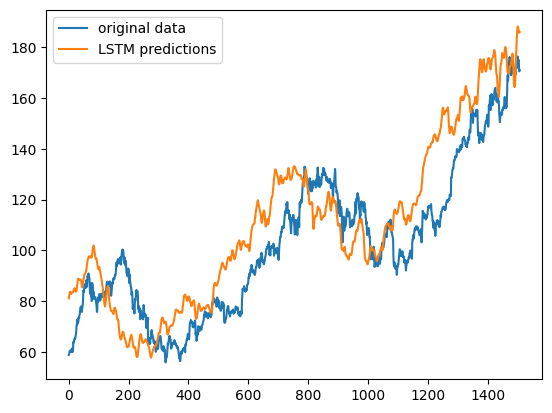

In [14]:
# ploting results
plt.plot(train_data[:len(x_train)].Close, label='original data')
plt.plot(np.reshape(scaler.inverse_transform(model.predict(x_train)), y_train.shape), label = 'LSTM predictions')
plt.legend(loc='best')
plt.show()

48/48 [==============================] - 1s 18ms/step


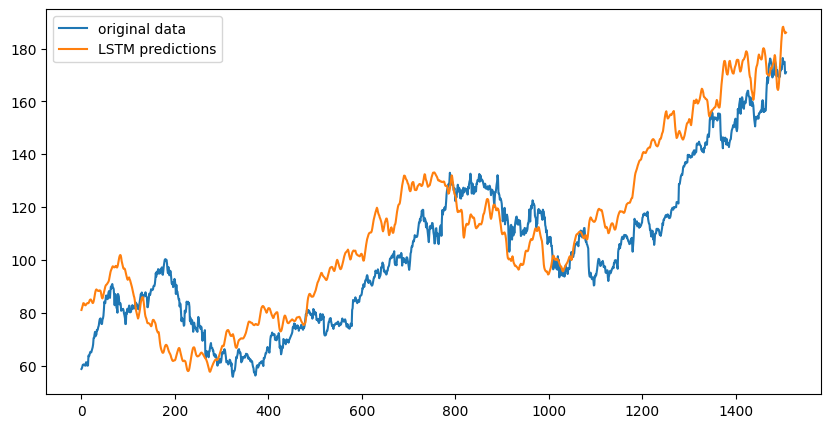

In [15]:
# ploting results
plt.figure(figsize=(10,5))
plt.plot(train_data[:len(x_train)].Close, label='original data')
plt.plot(np.reshape(scaler.inverse_transform(model.predict(x_train)), y_train.shape), label = 'LSTM predictions')
plt.legend(loc='best')
plt.show()

In [ ]:
# # saving the model for streamlit web application
# model.save("LSTM_Trained.h5")

In [16]:
# testing the model
test_data

,Close
1608,188.149994
1609,188.580002
1610,187.899994
1611,187.500000
1612,186.869995
...,...
2006,284.000000
2007,284.269989
2008,289.910004
2009,289.799988


In [17]:
# we need to have 100 lag features to predict the close price in test so we need to append those values in test_data
past_100_days = train_data.tail(100)
new_test_data_with_index = past_100_days.append(test_data, ignore_index=False)
new_test_data = past_100_days.append(test_data, ignore_index=True)
new_test_data_with_index

,Close
1508,169.229996
1509,172.259995
1510,172.229996
1511,173.029999
1512,175.000000
...,...
2006,284.000000
2007,284.269989
2008,289.910004
2009,289.799988


In [18]:
# appliing minmax scaler
scaler_test = MinMaxScaler()
input_data = scaler_test.fit_transform(new_test_data)
input_data
input_data.shape

(503, 1)

In [19]:
# Data preparation for testing
x_test = []
for i in range(n_features_of_lags, input_data.shape[0]):
    x_test.append(input_data[i-100: i, 0])
y_test = test_data['Close'].values

# converting into numpy array
x_test = np.array(x_test)
x_test.shape, y_test.shape

# reshaping the test data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(403, 100, 1)

In [20]:
# making predictions
y_pred = scaler_test.inverse_transform(model.predict(x_test))
y_pred = np.reshape(y_pred, y_test.shape)
y_pred

13/13 [==============================] - 0s 17ms/step


array([189.05171, 189.27731, 189.62416, 189.84094, 189.87263, 189.68182,
       190.0501 , 190.90768, 192.11415, 193.40965, 194.43787, 194.78976,
       194.61383, 194.39607, 193.88907, 193.35718, 192.54735, 191.7505 ,
       190.55199, 189.55313, 188.66939, 187.93127, 186.91002, 186.37206,
       186.14644, 186.38779, 186.75557, 187.49208, 187.67517, 187.80351,
       188.33757, 189.38704, 190.50081, 190.99428, 191.63013, 192.26865,
       192.69957, 193.02966, 193.02583, 193.13232, 193.18684, 193.23862,
       193.55496, 194.26682, 194.96379, 194.88277, 194.20476, 193.42682,
       194.38533, 196.70992, 199.63226, 202.70601, 205.33922, 207.39166,
       209.05078, 209.95518, 210.54337, 211.00737, 211.4004 , 212.22743,
       213.71979, 215.0672 , 216.02498, 216.58575, 216.90965, 217.18532,
       217.73723, 218.6468 , 220.11847, 221.939  , 224.01065, 226.04744,
       227.44728, 227.4183 , 226.2847 , 224.21681, 223.39404, 222.80547,
       223.58218, 224.45586, 223.9138 , 222.88956, 

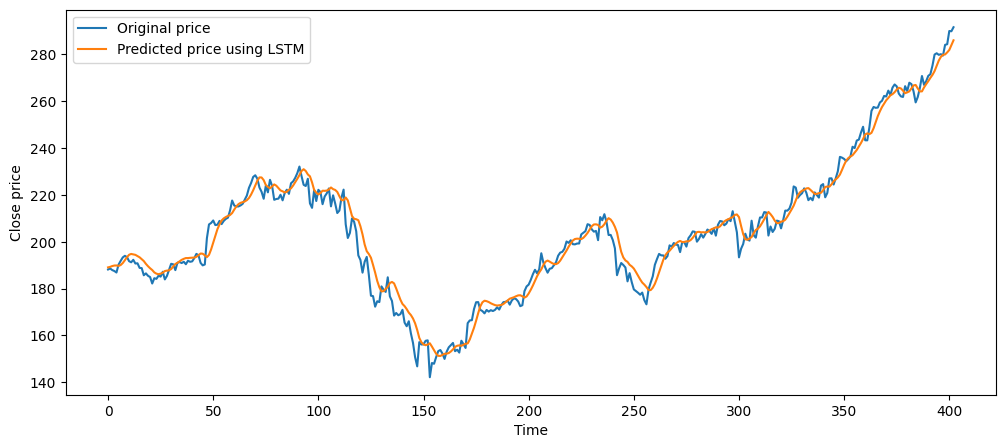

In [21]:
# Ploting prediction Vs true values
plt.figure(figsize=(12,5))
plt.plot(y_test, label = 'Original price')
plt.plot(y_pred, label = 'Predicted price using LSTM')
plt.xlabel("Time")
plt.ylabel("Close price")
plt.legend(loc='best')
plt.show()

In [22]:
# Defing Evaluation metrics RMSE & MAPE

def rmse(y, y_pred):
    return np.sqrt(np.mean((np.array(y)-np.array(y_pred))**2))

def mape(true_values, forecast_values): 
    true_values, forecast_values = np.array(true_values), np.array(forecast_values)
    return np.mean(np.abs((true_values - forecast_values) / true_values)) * 100

In [23]:
print('test MAPE:' ,mape(y_test,y_pred).round(2))
print('test RMSE:' ,rmse(y_test,y_pred).round(2))

test MAPE: 1.89
test RMSE: 5.01


In [24]:
df_train = pd.concat([train_data,  pd.DataFrame()])

In [25]:
df_pred = pd.concat([test_data, pd.DataFrame(y_pred, columns=['predicted_values for data'], index=test_data.index)],axis=1)
df_pred

,Close,predicted_values for data
1608,188.149994,189.051712
1609,188.580002,189.277313
1610,187.899994,189.624161
1611,187.500000,189.840942
1612,186.869995,189.872635
...,...,...
2006,284.000000,279.896973
2007,284.269989,280.786133
2008,289.910004,281.823914
2009,289.799988,283.875580


In [26]:
y_train_result = np.reshape(scaler.inverse_transform(model.predict(x_train)), y_train.shape)
y_train_result.shape

48/48 [==============================] - 1s 27ms/step


(1508,)

In [27]:
pred_df_train = pd.concat([train_data, pd.DataFrame(y_train_result, columns=['predicted_values for data'], index=train_data[100:].index)],axis=1)
pred_df_train

,Close,predicted_values for data
0,58.747143,NaN
1,59.062859,NaN
2,59.718571,NaN
3,60.342857,NaN
4,60.247143,NaN
...,...,...
1603,186.990005,186.929398
1604,186.309998,186.355469
1605,187.630005,185.814468
1606,187.160004,185.840866


In [37]:
complete_pred_df = pd.concat([pred_df_train, df_pred])
complete_pred_df = pd.concat([df[['Date']] ,complete_pred_df], axis=1)
complete_pred_df

,Date,Close,predicted_values for data
0,2012-01-03,58.747143,NaN
1,2012-01-04,59.062859,NaN
2,2012-01-05,59.718571,NaN
3,2012-01-06,60.342857,NaN
4,2012-01-09,60.247143,NaN
...,...,...,...
2006,2019-12-23,284.000000,279.896973
2007,2019-12-24,284.269989,280.786133
2008,2019-12-26,289.910004,281.823914
2009,2019-12-27,289.799988,283.875580


In [50]:
complete_pred_df = complete_pred_df.set_index(complete_pred_df['Date'])
complete_pred_df.index = pd.to_datetime(complete_pred_df.index)
complete_pred_df

,Date,Close,predicted_values for data
Date,,,
2012-01-03,2012-01-03,58.747143,NaN
2012-01-04,2012-01-04,59.062859,NaN
2012-01-05,2012-01-05,59.718571,NaN
2012-01-06,2012-01-06,60.342857,NaN
2012-01-09,2012-01-09,60.247143,NaN
...,...,...,...
2019-12-23,2019-12-23,284.000000,279.896973
2019-12-24,2019-12-24,284.269989,280.786133
2019-12-26,2019-12-26,289.910004,281.823914


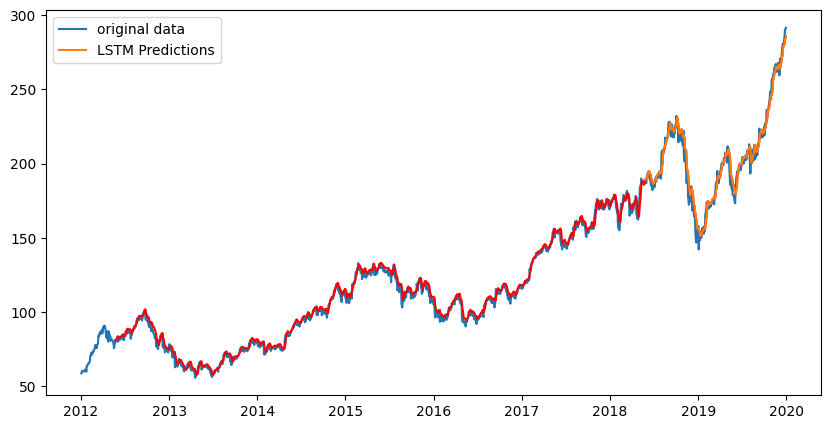

In [54]:
plt.figure(figsize=(10,5))
plt.plot(complete_pred_df.Close, label='original data')
plt.plot(complete_pred_df['predicted_values for data'], 'r', )
plt.plot(complete_pred_df['predicted_values for data'][len(train_data):], label='LSTM Predictions')
plt.legend(loc='best')
plt.show()

In [ ]:
# Acessing Close price using pandas DateTime index
complete_pred_df['Close'].loc['2019-12-30']

**predicting next 30 days data**

*our tast is to find 'x_next' to predict 'y_next'*

In [62]:
next_data = pd.DataFrame()
next_data['Close'] = []
next_data
# remember need to add next 30 days dates

,Close


In [58]:
test_data.tail(100)

,Close
1911,203.429993
1912,200.990005
1913,200.479996
1914,208.970001
1915,202.750000
...,...
2006,284.000000
2007,284.269989
2008,289.910004
2009,289.799988


In [77]:
# we need to have 100 lag features to predict the close price in next_data so we need to append those values in nextt_data
past_130_days_next = test_data.tail(130)
# new_test_data_with_index = past_100_days.append(test_data, ignore_index=False)
new_next_data = past_130_days_next.append(next_data['Close'], ignore_index=True)
new_next_data = new_next_data[:-1]
new_next_data

,Close
0,199.800003
1,199.740005
2,197.919998
3,201.550003
4,202.729996
...,...
125,284.000000
126,284.269989
127,289.910004
128,289.799988


In [78]:
# appliing minmax scaler
scaler_next = MinMaxScaler()
input_data_next = scaler_next.fit_transform(new_next_data)
input_data_next.shape

(130, 1)

In [ ]:
# Data preparation for testing
x_next = []
for i in range(n_features_of_lags, input_data_next.shape[0]):
  x_next.append(input_data_next[i-100: i, 0])

# converting into numpy array
x_next = np.array(x_next)
x_next.shape

# reshaping the test data
x_next = np.reshape(x_next, (x_next.shape[0], x_next.shape[1],1))
x_next.shape

In [84]:
type(y_test)

numpy.ndarray

In [87]:
x_next.shape[0]

30

In [90]:
# making predictions for next 30 days
y_next = scaler_next.inverse_transform(model.predict(x_next))
y_next = np.reshape(y_next, (30,))
y_next

1/1 [==============================] - 0s 53ms/step


array([263.0164 , 263.92233, 264.97748, 265.75983, 265.50598, 264.56598,
       263.49982, 263.70746, 264.05923, 265.16467, 266.31036, 266.5381 ,
       265.1846 , 263.96277, 263.99167, 265.30963, 266.54794, 267.80814,
       269.2231 , 270.54724, 272.15475, 274.21603, 276.32303, 277.99997,
       279.18546, 279.68063, 280.7158 , 281.8263 , 283.6999 , 285.6249 ],
      dtype=float32)

In [92]:
next_30 = pd.DataFrame()
next_30['LSTM predicted Close price'] = y_next
next_30.head()
# Now we need to add Date Time index

,LSTM predicted Close price
0,263.016388
1,263.922333
2,264.977478
3,265.759827
4,265.505981


In [120]:
# creating a function for weekdays
import holidays
Holiday = holidays.DE()
def getNextBusinessDay(date, n):
  for i in range(n):
    nextday = date + dt.timedelta(days=1) 
    while nextday.weekday()>4 or nextday in Holiday:
      nextday += dt.timedelta(days=1)
    date = nextday
  return date
  
# date = end date(today), n= no.of days price to be predicted

In [126]:
dates = []
for i in range(0,30):
  dates.append(getNextBusinessDay(dt.datetime.strptime('2019-12-30', '%Y-%m-%d'),i))
dates

array([datetime.datetime(2019, 12, 30, 0, 0),
       datetime.datetime(2019, 12, 31, 0, 0),
       datetime.datetime(2020, 1, 2, 0, 0),
       datetime.datetime(2020, 1, 3, 0, 0),
       datetime.datetime(2020, 1, 6, 0, 0),
       datetime.datetime(2020, 1, 7, 0, 0),
       datetime.datetime(2020, 1, 8, 0, 0),
       datetime.datetime(2020, 1, 9, 0, 0),
       datetime.datetime(2020, 1, 10, 0, 0),
       datetime.datetime(2020, 1, 13, 0, 0),
       datetime.datetime(2020, 1, 14, 0, 0),
       datetime.datetime(2020, 1, 15, 0, 0),
       datetime.datetime(2020, 1, 16, 0, 0),
       datetime.datetime(2020, 1, 17, 0, 0),
       datetime.datetime(2020, 1, 20, 0, 0),
       datetime.datetime(2020, 1, 21, 0, 0),
       datetime.datetime(2020, 1, 22, 0, 0),
       datetime.datetime(2020, 1, 23, 0, 0),
       datetime.datetime(2020, 1, 24, 0, 0),
       datetime.datetime(2020, 1, 27, 0, 0),
       datetime.datetime(2020, 1, 28, 0, 0),
       datetime.datetime(2020, 1, 29, 0, 0),
       datetim

In [127]:
next_30['Date'] = dates
# these range of nedd to give from the external user!
next_30.head()

,LSTM predicted Close price,Date
0,263.016388,2019-12-30
1,263.922333,2019-12-31
2,264.977478,2020-01-02
3,265.759827,2020-01-03
4,265.505981,2020-01-06


In [132]:
# making datetime index to acess data using date
next_30.index = pd.to_datetime(next_30['Date']) 
next_30 =next_30.drop('Date', axis=1)
next_30
# give user input for date and it returns predicted price on that day...

,LSTM predicted Close price
Date,
2019-12-30,263.016388
2019-12-31,263.922333
2020-01-02,264.977478
2020-01-03,265.759827
2020-01-06,265.505981
2020-01-07,264.565979
2020-01-08,263.499817
2020-01-09,263.707458
2020-01-10,264.059235


In [140]:
# accessing data using index date
def pred_close(date):
  if date in next_30.index:
    print(next_30['LSTM predicted Close price'].loc[date])
  else:
    print("Given Date is a Holiday!")

In [142]:
pred_close('2020-02-03')

279.18546


END!!!